In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.utils import to_categorical

In [3]:
# Load dataset
df = pd.read_csv("winequality-white-resampled_smote_enn.csv")

# Splitting the data into features and target
X = df.drop('quality', axis=1)
y = df['quality']

In [4]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Random Forest model
rf = RandomForestClassifier(n_estimators=450, max_depth=25, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
conf_matrix_normalized = confusion_matrix(y_test, rf_predictions, normalize='true')
print("Normalized Confusion Matrix:")
print(conf_matrix_normalized)

Random Forest Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       427
           4       0.95      0.99      0.97       395
           5       0.95      0.87      0.91       219
           6       0.88      0.60      0.72        63
           7       0.93      0.94      0.94       313
           8       0.97      1.00      0.98       408
           9       1.00      1.00      1.00       425

    accuracy                           0.97      2250
   macro avg       0.95      0.92      0.93      2250
weighted avg       0.97      0.97      0.96      2250

Random Forest Confusion Matrix:
[[427   0   0   0   0   0   0]
 [  0 392   1   0   2   0   0]
 [  1  18 191   3   6   0   0]
 [  1   2   7  38  13   1   1]
 [  0   1   3   2 295  12   0]
 [  0   0   0   0   2 406   0]
 [  0   0   0   0   0   0 425]]
Normalized Confusion Matrix:
[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         

In [5]:
# SVM model
svm_model = SVC(kernel='rbf',C=1000, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))
conf_matrix_normalized = confusion_matrix(y_test, svm_predictions, normalize='true')
print("Normalized Confusion Matrix:")
print(conf_matrix_normalized)

SVM Classification Report:
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       427
           4       0.94      0.99      0.96       395
           5       0.95      0.83      0.89       219
           6       0.67      0.65      0.66        63
           7       0.94      0.91      0.92       313
           8       0.96      0.99      0.97       408
           9       1.00      1.00      1.00       425

    accuracy                           0.96      2250
   macro avg       0.92      0.91      0.92      2250
weighted avg       0.96      0.96      0.96      2250

SVM Confusion Matrix:
[[427   0   0   0   0   0   0]
 [  0 391   3   0   0   1   0]
 [  2  20 182  11   4   0   0]
 [  1   2   4  41  11   4   0]
 [  1   3   3   9 285  12   0]
 [  0   0   0   0   4 404   0]
 [  0   0   0   0   0   0 425]]
Normalized Confusion Matrix:
[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.98987342 0.0075949

In [6]:
# Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=1000, random_state=42)
gb.fit(X_train_scaled, y_train)
gb_predictions = gb.predict(X_test_scaled)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))
conf_matrix_normalized = confusion_matrix(y_test, gb_predictions, normalize='true')
print("Normalized Confusion Matrix:")
print(conf_matrix_normalized)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       427
           4       0.94      0.99      0.96       395
           5       0.92      0.83      0.88       219
           6       0.65      0.62      0.63        63
           7       0.92      0.90      0.91       313
           8       0.95      0.98      0.96       408
           9       1.00      1.00      1.00       425

    accuracy                           0.95      2250
   macro avg       0.91      0.90      0.91      2250
weighted avg       0.95      0.95      0.95      2250

Gradient Boosting Confusion Matrix:
[[427   0   0   0   0   0   0]
 [  0 391   2   0   1   1   0]
 [  0  17 182  12   5   3   0]
 [  0   3   8  39  11   1   1]
 [  0   5   3   8 281  16   0]
 [  0   1   2   1   6 398   0]
 [  0   0   0   0   0   0 425]]
Normalized Confusion Matrix:
[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0. 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Load the dataset
data = pd.read_csv('winequality-white-resampled_smote_enn.csv')

# Define features and target variable
X = data.drop(columns='quality')
y = data['quality']
y=y-3

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the XGBoost model with reduced complexity
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=3000, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions with XGBoost
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_classification_report = classification_report(y_test, xgb_predictions)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)

# Normalize the confusion matrix
xgb_conf_matrix_normalized = xgb_confusion_matrix.astype('float') / xgb_confusion_matrix.sum(axis=1)[:, np.newaxis]

print("XGBoost Model")
print(f"Accuracy: {xgb_accuracy}")
print("Classification Report:\n", xgb_classification_report)
print("Confusion Matrix:\n", xgb_confusion_matrix)
print("Normalized Confusion Matrix:\n", xgb_conf_matrix_normalized)

# Train the Gradient Boosting model
gbc_model = GradientBoostingClassifier(random_state=42, n_estimators=3000, learning_rate=0.1)
gbc_model.fit(X_train_scaled, y_train)

# Make predictions with Gradient Boosting
gbc_predictions = gbc_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
gbc_accuracy = accuracy_score(y_test, gbc_predictions)
gbc_classification_report = classification_report(y_test, gbc_predictions)
gbc_confusion_matrix = confusion_matrix(y_test, gbc_predictions)

# Normalize the confusion matrix
gbc_conf_matrix_normalized = gbc_confusion_matrix.astype('float') / gbc_confusion_matrix.sum(axis=1)[:, np.newaxis]

print("Gradient Boosting Model")
print(f"Accuracy: {gbc_accuracy}")
print("Classification Report:\n", gbc_classification_report)
print("Confusion Matrix:\n", gbc_confusion_matrix)
print("Normalized Confusion Matrix:\n", gbc_conf_matrix_normalized)

XGBoost Model
Accuracy: 0.976
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       0.96      0.99      0.98       389
           2       0.96      0.89      0.92       197
           3       0.96      0.78      0.86        83
           4       0.95      0.96      0.96       307
           5       0.97      1.00      0.99       415
           6       1.00      1.00      1.00       438

    accuracy                           0.98      2250
   macro avg       0.97      0.95      0.96      2250
weighted avg       0.98      0.98      0.98      2250

Confusion Matrix:
 [[421   0   0   0   0   0   0]
 [  1 387   0   0   1   0   0]
 [  0  17 175   1   4   0   0]
 [  0   0   5  65   9   4   0]
 [  0   0   3   2 295   7   0]
 [  0   0   0   0   0 415   0]
 [  0   0   0   0   0   0 438]]
Normalized Confusion Matrix:
 [[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.0025

In [9]:
# ANN model
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
ann = Sequential([
    Dense(128, activation='relu', input_shape=(11,)),
    Dense(64, activation='relu'),
    Dense(np.max(y)+1, activation='softmax')
])
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train_scaled, y_train_cat, epochs=1000, batch_size=32)
ann_predictions = np.argmax(ann.predict(X_test_scaled), axis=1)
print("ANN Classification Report:")
print(classification_report(y_test, ann_predictions))
print("ANN Confusion Matrix:")
print(confusion_matrix(y_test, ann_predictions))

Epoch 1/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.0249 - accuracy: 0.6252
Epoch 2/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.6724 - accuracy: 0.7413
Epoch 3/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.7826
Epoch 4/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.5158 - accuracy: 0.8039
Epoch 5/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4730 - accuracy: 0.8265
Epoch 6/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.8353
Epoch 7/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8503
Epoch 8/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.8583
Epoch 9/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8708
Epoch 10/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.346

In [10]:
# CNN model (Adjusting input shape for 1D convolutions)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(11,1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(np.max(y)+1, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cat, epochs=1000, batch_size=32)
cnn_predictions = np.argmax(cnn.predict(X_test_cnn), axis=1)
print("CNN Classification Report:")
print(classification_report(y_test, cnn_predictions))
print("CNN Confusion Matrix:")
print(confusion_matrix(y_test, cnn_predictions))

Epoch 1/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.9944 - accuracy: 0.6378
Epoch 2/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.6665 - accuracy: 0.7471
Epoch 3/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.5829 - accuracy: 0.7801
Epoch 4/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.5310 - accuracy: 0.8007
Epoch 5/1000
282/282 [==============================] - 1s 5ms/step - loss: 0.4882 - accuracy: 0.8177
Epoch 6/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4532 - accuracy: 0.8328
Epoch 7/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.4322 - accuracy: 0.8387
Epoch 8/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4029 - accuracy: 0.8508
Epoch 9/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8576
Epoch 10/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.369

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11, 1)]           0         
                                                                 
 gru_1 (GRU)                 (None, 11, 256)           198912    
                                                                 
 flatten_2 (Flatten)         (None, 2816)              0         
                                                                 
 dense_6 (Dense)             (None, 7)                 19719     
                                                                 
Total params: 218631 (854.03 KB)
Trainable params: 218631 (854.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
281/282 [============================>.] - ETA: 0s - loss: 1.0265 - accuracy: 0.6185
Epoch 1: val_accuracy improved from -inf to 0.70756, sa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


281/282 [============================>.] - ETA: 0s - loss: 0.6383 - accuracy: 0.7531
Epoch 2: val_accuracy improved from 0.70756 to 0.77067, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
282/282 [==============================] - 14s 49ms/step - loss: 0.6381 - accuracy: 0.7532 - val_loss: 0.6240 - val_accuracy: 0.7707 - lr: 9.0484e-04
Epoch 3/40
280/282 [============================>.] - ETA: 0s - loss: 0.5011 - accuracy: 0.8132
Epoch 3: val_accuracy improved from 0.77067 to 0.82178, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
282/282 [==============================] - 10s 34ms/step - loss: 0.5003 - accuracy: 0.8134 - val_loss: 0.4933 - val_accuracy: 0.8218 - lr: 8.1873e-04
Epoch 4/40
282/282 [==============================] - ETA: 0s - loss: 0.4032 - accuracy: 0.8545
Epoch 4: val_accuracy improved from 0.82178 to 0.86311, saving model to C:\Users\prana\OneDrive\Desktop\best_model.h5
282/282 [==============================] - 10s 34ms/step - loss: 0.40

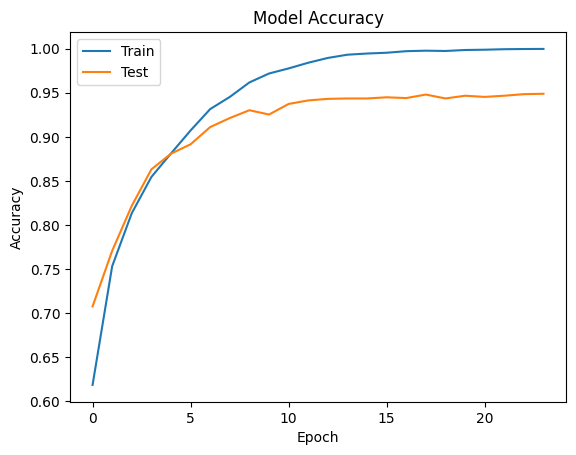

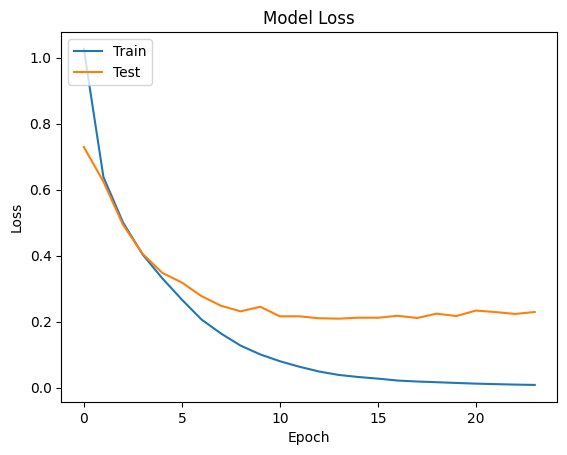

Test Accuracy: 94.889%
71/71 [==============================] - 1s 9ms/step


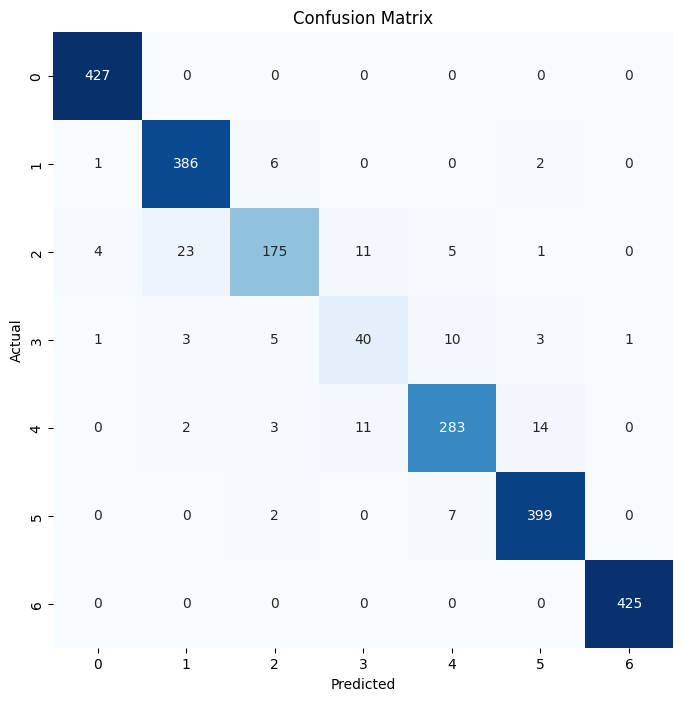

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       427
           1       0.93      0.98      0.95       395
           2       0.92      0.80      0.85       219
           3       0.65      0.63      0.64        63
           4       0.93      0.90      0.92       313
           5       0.95      0.98      0.96       408
           6       1.00      1.00      1.00       425

    accuracy                           0.95      2250
   macro avg       0.91      0.90      0.90      2250
weighted avg       0.95      0.95      0.95      2250



In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("winequality-white-resampled_smote_enn.csv")

# Preprocess the dataset
data['quality'] = pd.Categorical(data['quality'])
data['quality'] = data['quality'].cat.codes
y = data.pop('quality')
X = data

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert labels to one-hot encoding
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Model setup
inputs = Input(shape=(X_train.shape[1], 1))
gru = GRU(256, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(y_train.shape[1], activation='softmax')(flat)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

# Training the model
def train_model(model, x_train, y_train, x_test, y_test, save_to, epochs):
    opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint(f'{save_to}best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

    model.compile(optimizer=opt_adam, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test), callbacks=[es, mc, lr_schedule])
    saved_model = load_model(f'{save_to}best_model.h5')
    return model, history

model, history = train_model(model, X_train, y_train, X_test, y_test, save_to='C:\\Users\\prana\\OneDrive\\Desktop\\', epochs=40)

# Plotting training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluating the model
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

# Predictions and Metrics
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test_labels = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test_labels, y_pred)
clr = classification_report(y_test_labels, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('winequality-white-resampled_smote_enn.csv')

# Separate features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Adjust target variable classes to start from 0
y = y - 3  # Subtract 3 from all target values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(random_state=42)
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("-" * 80)

Model: Random Forest
Accuracy: 0.9533333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       0.92      0.98      0.95       395
           2       0.91      0.80      0.85       219
           3       0.90      0.56      0.69        63
           4       0.91      0.92      0.92       313
           5       0.95      0.99      0.97       408
           6       1.00      1.00      1.00       425

    accuracy                           0.95      2250
   macro avg       0.94      0.89      0.91      2250
weighted avg       0.95      0.95      0.95      2250

--------------------------------------------------------------------------------
Model: XGBoost
Accuracy: 0.9377777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       427
           1       0.93      0.98      0.95       395
           2       

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the base models
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('dt', decision_tree), ('knn', knn)], voting='hard')

# Train the model
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9164444444444444

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('winequality-white-resampled_smote_enn.csv')

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the base models
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('rf', random_forest), ('xgb', xgboost)], voting='soft')

# Train the model
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.9658
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       427
           4       0.95      0.99      0.97       395
           5       0.94      0.86      0.90       219
           6       0.83      0.62      0.71        63
           7       0.93      0.95      0.94       313
           8       0.97      0.99      0.98       408
           9       1.00      1.00      1.00       425

    accuracy                           0.97      2250
   macro avg       0.95      0.92      0.93      2250
weighted avg       0.96      0.97      0.96      2250



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('winequality-white-resampled_smote_enn.csv')

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the base models
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('rf', random_forest), ('xgb', xgboost)], voting='soft')

# Train the model
voting_clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.9462
Classification Report:
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       427
           4       0.93      0.98      0.95       395
           5       0.89      0.78      0.83       219
           6       0.86      0.57      0.69        63
           7       0.91      0.89      0.90       313
           8       0.94      0.99      0.97       408
           9       1.00      1.00      1.00       425

    accuracy                           0.95      2250
   macro avg       0.93      0.89      0.90      2250
weighted avg       0.94      0.95      0.94      2250



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Load the dataset
df = pd.read_csv('winequality-white-resampled_smote_enn.csv')

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Adjust target variable classes to start from 0
y = y - 3  # Subtract 3 from all target values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
# ... (rest of the code remains the same)

# Hyperparameter tuning for XGBoost
xgb_params = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42)
# Add this line to handle the adjusted target labels for XGBoost
xgb.objective = "multi:softmax"
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=50, cv=3, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Create the voting classifier with the best estimators from RandomizedSearchCV
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_random.best_estimator_),
    ('xgb', xgb_random.best_estimator_)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.9671
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       0.95      0.99      0.97       395
           2       0.93      0.88      0.90       219
           3       0.84      0.60      0.70        63
           4       0.93      0.95      0.94       313
           5       0.98      0.99      0.99       408
           6       1.00      1.00      1.00       425

    accuracy                           0.97      2250
   macro avg       0.95      0.92      0.93      2250
weighted avg       0.97      0.97      0.97      2250



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Stacked Model Regression Evaluation:
Mean Absolute Error (MAE): 0.12107162872513166
Mean Squared Error (MSE): 0.07734251072941613
Root Mean Squared Error (RMSE): 0.27810521521434317
R-squared (R²): 0.9847433603670078
Accuracy within ±0.5: 93.56%


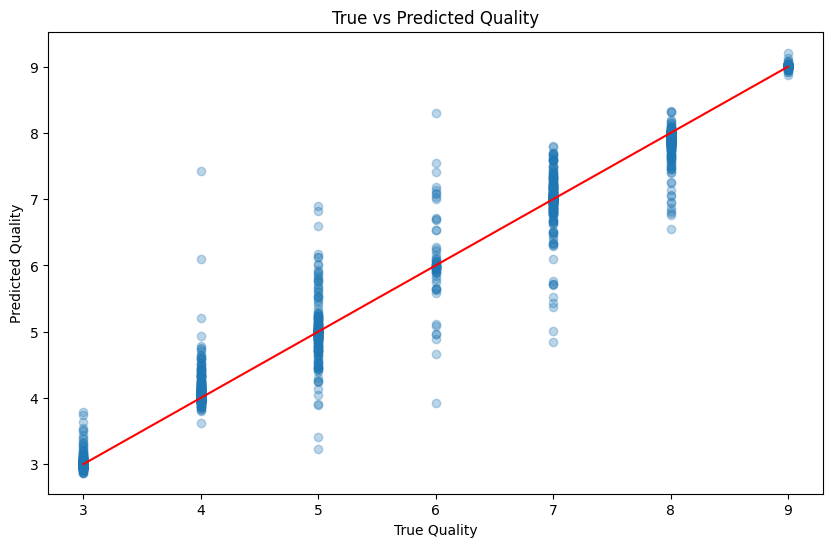

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("winequality-white-resampled_smote_enn.csv")

# Splitting the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining base models with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter grids
rf_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1]
}

# Randomized search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)

# Fitting the models
rf_random.fit(X_train_scaled, y_train)
xgb_random.fit(X_train_scaled, y_train)

# Best estimators
best_rf = rf_random.best_estimator_
best_xgb = xgb_random.best_estimator_

# Defining the stacking regressor with the tuned models
stacked_model = StackingRegressor(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
    ],
    final_estimator=LinearRegression(),
    cv=5
)

# Training the stacking regressor
stacked_model.fit(X_train_scaled, y_train)

# Predictions
stacked_predictions = stacked_model.predict(X_test_scaled)

# Evaluation
print("Stacked Model Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, stacked_predictions)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, stacked_predictions)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, stacked_predictions))}")
print(f"R-squared (R²): {r2_score(y_test, stacked_predictions)}")

# Calculate accuracy within a threshold
threshold = 0.5
accuracy = np.mean(np.abs(stacked_predictions - y_test) <= threshold)
print(f"Accuracy within ±{threshold}: {accuracy * 100:.2f}%")

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, stacked_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('True vs Predicted Quality')
plt.show()


Stacked Model Regression Evaluation:
Mean Absolute Error (MAE): 0.1340057654569175
Mean Squared Error (MSE): 0.08565713388415666
Root Mean Squared Error (RMSE): 0.2926724002774376
R-squared (R²): 0.9831032117868848
Accuracy within ±0.5: 93.29%


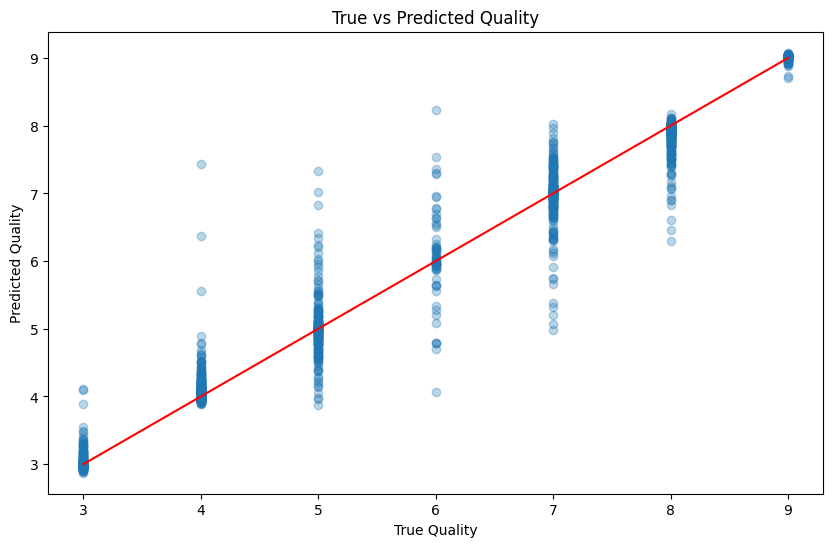

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("winequality-white-resampled_smote_enn.csv")

# Splitting the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining base models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Defining the stacking regressor with the base models
stacked_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
    ],
    final_estimator=LinearRegression(),
    cv=5
)

# Training the stacking regressor
stacked_model.fit(X_train_scaled, y_train)

# Predictions
stacked_predictions = stacked_model.predict(X_test_scaled)

# Evaluation
print("Stacked Model Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, stacked_predictions)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, stacked_predictions)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, stacked_predictions))}")
print(f"R-squared (R²): {r2_score(y_test, stacked_predictions)}")

# Calculate accuracy within a threshold
threshold = 0.5
accuracy = np.mean(np.abs(stacked_predictions - y_test) <= threshold)
print(f"Accuracy within ±{threshold}: {accuracy * 100:.2f}%")

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, stacked_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('True vs Predicted Quality')
plt.show()


Stacked Model Classification Evaluation:
Accuracy: 0.9689
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       427
           4       0.97      0.99      0.98       395
           5       0.93      0.90      0.92       219
           6       0.74      0.67      0.70        63
           7       0.93      0.94      0.94       313
           8       0.98      0.99      0.99       408
           9       1.00      1.00      1.00       425

    accuracy                           0.97      2250
   macro avg       0.94      0.93      0.93      2250
weighted avg       0.97      0.97      0.97      2250



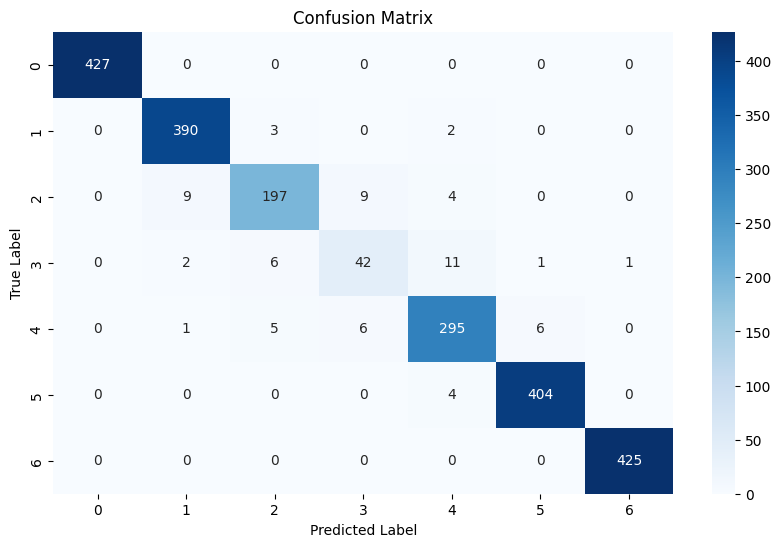

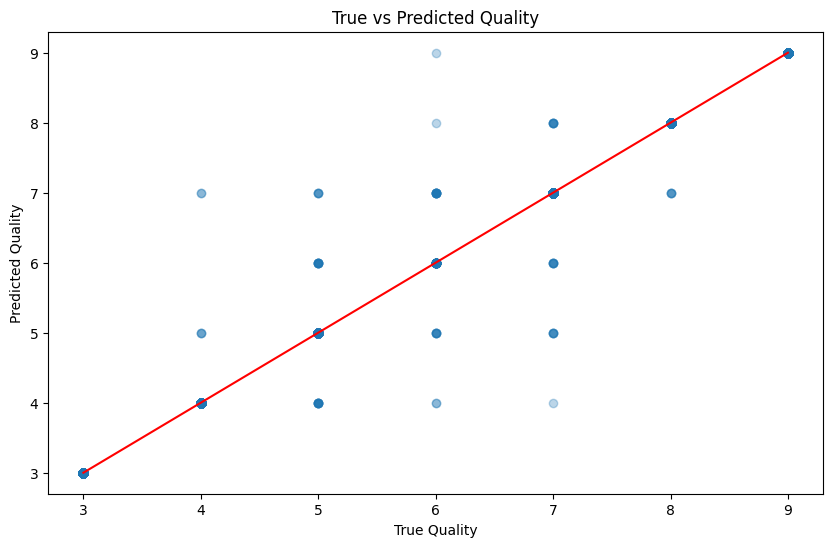

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("winequality-white-resampled_smote_enn.csv")

# Splitting the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining base models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(objective='multi:softprob', random_state=42)

# Defining the stacking classifier with the base models
stacked_model = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Training the stacking classifier
stacked_model.fit(X_train_scaled, y_train)

# Predictions
stacked_predictions = stacked_model.predict(X_test_scaled)

# Evaluation
print("Stacked Model Classification Evaluation:")
accuracy = accuracy_score(y_test, stacked_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Generate the classification report
report = classification_report(y_test, stacked_predictions)
print('Classification Report:')
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, stacked_predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Scatter plot of true vs predicted values (for a quick visual check, although not common for classification)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, stacked_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('True vs Predicted Quality')
plt.show()
